# TP : AI for Image Quality Assessment

### Adib Habbou

The objective of this TP is to give you some practical insights about what is the construction of a dataset and the problematic and modeling of annotations.
You will not train a model in this TP, but you will see some practical aspects that ML engineer have to face when they are asked to design model: get clean and good data.

Answer the questions below and then export the notebook with the answers using the menu option File->Download .ipynb. **[Then submit your solution here!](https://docs.google.com/forms/d/e/1FAIpQLSf1RKdUeP3fFogaQ2TqDfSO8fQnxG8dFI-wh7c-ywuLj7BYkA/viewform)**

# Part 1 - Designing annotation campaigns to build IQA datasets

> ### Question1: Cite five difficulties encountred when developping an IQA dataset

> #### A1:

* **Subjectivity and Perception Variability:** all people don't have the same idea of what can be qualified as a good quality
* **Diversity:** it's hard to have images representing all the ethnicities to avoid having biais in the model
* **Real-word:** being sure that the dataset represents all the variabilty of real-word scenarios such as luminosty
* **Annotation Consistency:** ensuring consistent and reliable annotations by human evaluators
* **Data Privacy:** respect the GPDR rules for the image used

> ### Question2: Cite four methods of annotating image quality

> #### A2:

* **Pair-Wise comparaison:** comparing two images and choosing the best one
* **Mean Opinion Score:** giving a score to a lot of images and averaging them
* **Ruler Method:** giving a score to a grid of images
* **Pair-Wise for Just Objectionnable Difference** comparing two images and choosing the one that has the most difference


> ### Question3: For the two most common methods, which one do you think is a better choice? Cite a situation for each method where it is preferable. Answer these questions by citing two pros and two cons of each method and argument your choice of situations.


> #### A3:
* **Pair-Wise Comparaison Pros:** really simple to implement and understand, provides clear ranking of images
* **Pair-Wise Comparaison Cons:** can be time consuming, can be difficult to compare images with really similar qualities
* **Mean Opinion Score Pros:** can be used to compare images with similar qualities, and to compare more than two images
* **Mean Opinion Score Cons:** can be difficult to understand for the annotators, can be difficult to implement

> ### Q4: Let's now focus on Pairwise comparison methods (PWC) and Mean Opinion Score (MOS). Let's imagine that comparing the quality between two images can take on average 5 seconds (PWC), while evaluating the quality of a single image can take around 15 seconds (MOS). Calculate the necessary time to do a full pass of annotations for one person for both methods in Q3. What's the total number of data points (comparisons for PWC and evaluations for MOS) for both methods?


> #### A4:

If we denote $N$ the number of images to annotate, we have:

* **Pair-Wise Comparaison:** we have $\frac{N(N-1)}{2}$ data points to annotate, so we have $\frac{N(N-1)}{2} \times 5$ seconds to annotate all the images
* **Mean Opinion Score:** we have $N$ data points to annotate, so we have $N \times 15$ seconds to annotate all the images

> ### Q5: Given an annotation campaign with N images. How does the time spent on the full annotation campaign change for each method? Plot the evolution of the total annotation cost per person (in minutes) in terms of N (1 to 50) for both methods. What is the minimum number of images on which comparisons (PWC) is more costly?


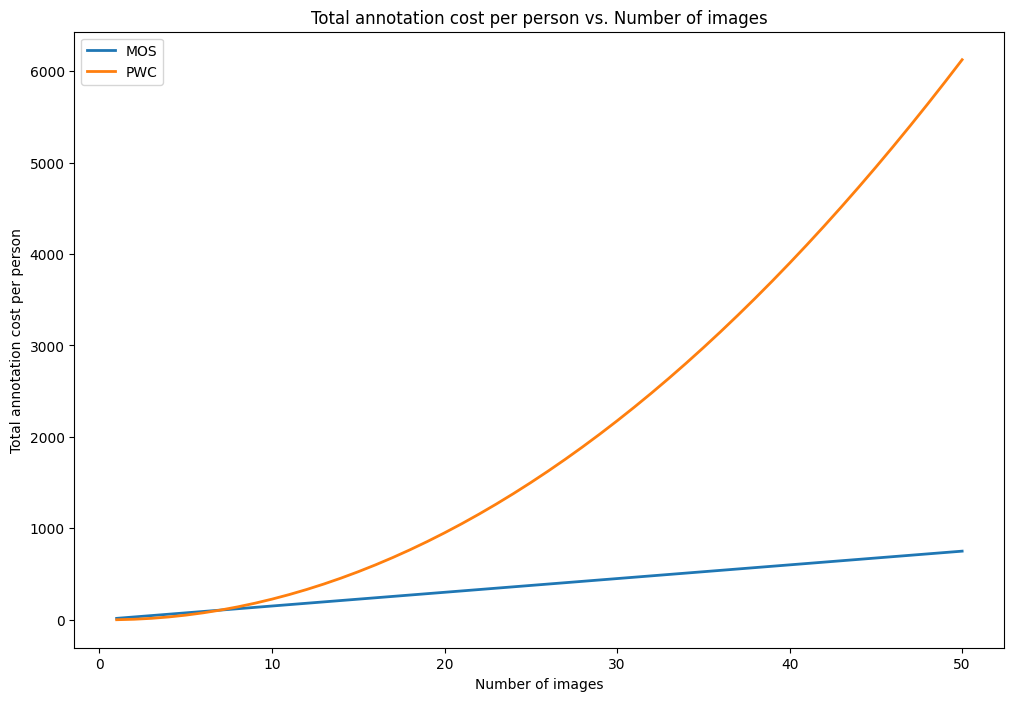

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]

pwc = []
mos = []
images = range(1, 51)

for N in images:
    pwc.append(5*N*(N-1)/2)
    mos.append(15*N)

plt.plot(images, mos, label='MOS', linewidth=2)
plt.plot(images, pwc, label='PWC', linewidth=2)
plt.xlabel('Number of images')
plt.ylabel('Total annotation cost per person')
plt.title('Total annotation cost per person vs. Number of images')
plt.legend()
plt.show()

In [3]:
for i in range(len(images)):
    if mos[i] < pwc[i]:
        print('Minimum number of images on which comparisons (PWC) is more costly is', images[i])
        break

Minimum number of images on which comparisons (PWC) is more costly is 8


> ### Q6: Redo the plot of Q5 taking into consideration that we need five times more single annotations to reach a similar precision with the comparisons

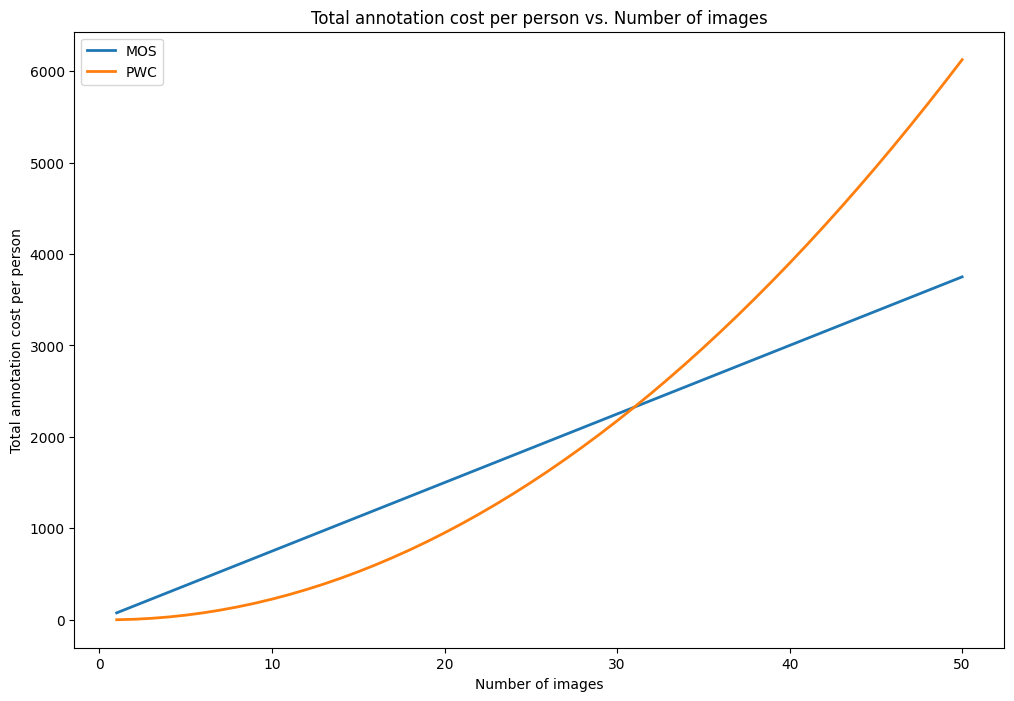

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]

pwc = []
mos = []
images = range(1, 51)

for N in images:
    pwc.append(5*N*(N-1)/2)
    mos.append(5*15*N)

plt.plot(images, mos, label='MOS', linewidth=2)
plt.plot(images, pwc, label='PWC', linewidth=2)
plt.xlabel('Number of images')
plt.ylabel('Total annotation cost per person')
plt.title('Total annotation cost per person vs. Number of images')
plt.legend()
plt.show()

In [5]:
for i in range(len(images)):
    if mos[i] < pwc[i]:
        print('Minimum number of images on which comparisons (PWC) is more costly is', images[i])
        break

Minimum number of images on which comparisons (PWC) is more costly is 32


> ### Q7: For big data sets, it is not feasible to do a complete design for all annotators and all images. How can we reduce the number of comparisons without losing much precision?

> #### A7:

In oder to reduce the number of comparaision without losing too much precision, we could use a sampling strategy, such as active sampling. These techniques aim to select the most informative samples for annotation, which can be used to train a model that can predict the quality of the remaining samples. The model can then be used to select the most informative samples for annotation. This process can be repeated until the model reaches a desired performance level.

> When the data is large, it is not possible to achieve a complete design (a full passage on all data points for each observer), hence a sampling strategy is necessary. To make big annotation campaigns more efficient, we can resort to active sampling techniques. Active sampling [1,2,3,4,5] is the process of optimally choosing the image pairs for PWC annotation tasks. Some of these techniques are more sophisticated than others.
>   ###### [1] Chen, Bennett, Collins-Thompson, Horvitz (2013). Pairwise ranking aggregation in a crowdsourced setting. In Proceedings of the sixth ACM international conference on Web search and data mining, pp. 193–202
>   ###### [2] Ye, Doermann (2014). Active sampling for subjective image quality assessment. In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 4249–4256.
>   ###### [3] Li, Mantiuk, Wang, Ling, Callet (2018). Hybrid-MST: A hybrid active sampling strategy for pairwise preference aggregation. arXiv preprint arXiv:1810.08851, pp.
>   ###### [4] Xu, Xiong, Chen, Huang, Yao (2018). Hodgerank with information maximization for crowdsourced pairwise ranking aggregation. In Proceedings of the AAAI Conference on Artificial Intelligence, pp.
>   ###### [5] Mikhailiuk, Wilmot, Perez-Ortiz, Yue, Mantiuk (2020). Active Sampling for Pairwise Comparisons via Approximate Message Passing and Information Gain Maximization. arXiv preprint arXiv:2004.05691, pp.
> ### Q8: What do you think are straighforward techniques of sampling in a pairwise comparison experiment (other than the ones mentioned above)? list two

> #### A8:

* **Random Sampling:** randomly select pairs of images to annotate
* **Systematic Sampling:** select pairs of images with a fixed interval

# Part 2 - PWC simulation experiment

In this part, we will be testing the previous assumptions by simulating a pairwise comparison experiment

In [6]:
import numpy as np
import time
import random
import math
from numpy.random import normal
import matplotlib.pyplot as plt
import torch
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [7]:
!pip install networkx==2.8.5
import networkx as nx

nx.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


'2.8.5'

In [157]:
# The following lines install the necessary packages in the colab environment
try:
    from google.colab import files
    !pip install -q hdf5storage

    !rm -fr TP-IQA
    !git clone --single-branch --quiet https://github.com/DXOMARK-OCTO/TP-IQA
    !cp -r TP-IQA/* .

except ImportError:
    # %matplotlib notebook
    pass

%matplotlib inline

import activepwcanalysis as adaComp
from activepwcanalysis import predictNext
from asapgpu import ASAP

> ### Q9: List the essential steps to simulate a pairwise comparison experiment.

> #### A9:

* **Select the Images**
* **Create Pair Combinations**
* **Prepare the Evaluation Interface**
* **Recruit Participants**
* **Provide Instructions**
* **Collect Pairwise Comparisons**
* **Aggregate and Analyze Data**
* **Interpret and Report Results**


## A - Observer simulator model

> Scaling methods transform the comparison matrices in a pairwise comparison experiment into JOD scores (Image quality scores). These methods assume that the quality of an image, from an observer's point of view, follows a certain probability distribution. This is called an observer model and is still subject to research. We will follow the popular Thurstone case V (Thurstone, 1927) model [6]. This model supposes that the quality difference between two images follows a random Gaussian distribution, whose uncertainty reflects the inter and intra-annotator disagreement. This noise follows the rule that for two images $r_i, r_j$, if 75\% of the comparisons indicated that $r_i$ was of better quality than $r_j$ , $P(r_i > r_j) = 0.75$, then the difference is exactly 1 $JOD$ (a unit in our image quality scale). For this distance and probability, for a gaussian distribution with 0 mean, the standard deviation is $\sigma=1.4826$.
> ###### [6] A practical guide and software for analysing pairwise comparison experiments. arXiv preprint arXiv:1712.03686, pp

> ### Q10: Fill in the following function, called pwcObserverSimulator, that takes a pair of image scores (pairScores), the standard deviation (jodStd) and returns a simulated comparison based on the Thurstone case V observer model. The function should return the rank of the input images:
> ### - (0,1) if the second image is better or
> ### - (1,0) if the first element has better quality.
> ### The function should also return the score difference with the noise.

In [9]:
def pwcObserverSimulator(pairScores, jodStd=1.4826, **kwargs):
    """
     1 - Our simulator takes a pair of images with known quality scores (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, jodStd)
     3 - Computes the difference and returns the rank and the score difference with the observer's bias
    """

    score1, score2 = pairScores
    observerBias = normal(0, jodStd)
    scorediff = score1 - score2 + observerBias

    if scorediff >= 0:
        rank = (1, 0)
    else:
        rank = (0, 1)

    return rank,scorediff

> ### Q11: Fill in the following function, called mosObserverSimulator, that takes an image score, adds noise, and returns the estimated MOS score.

In [10]:
def mosObserverSimulator(imageScore, mosStd=1.048, **kwargs):
    """
     1 - Our simulator takes an image with a known quality score (1,2,3,4,),
     2 - Adds an observer bias that follows N(0, mosStd)
     3 - Computes and returns the new noisy score
    """
    observerBias = normal(0, mosStd)

    noisyScore = imageScore + observerBias

    return noisyScore

## B - Sampling algorithms


> To see the effectiveness of the active sampling, we will be comparing a popular algorithm, ASAP [5] to three other simple sampling approaches: random sampling, ranking based sampling, and an optimized ranking based sampling. Sometimes, sampling algorithms can be computionally heavy. To accelerate the sampling process, instead of generating one pair at a time, we generate a batch of pairs, where each image is present at least one time. In total, we have batches of size n-1.

> ### Q12: Fill in the first two of the following functions that implement the three sampling approaches mentioned above.

In [11]:
def randomSampling(**kwargs):
    """
    1 - Takes the number of images and generate a batch of n-1 pairs where all images are at least once (we should avoid comparing the pair with itself)
    2 - Return the list of pairs
    """
    nbImages = kwargs.get('nbImages', None)

    pairList = []

    for i in range(nbImages):
        for j in range(i+1, nbImages):
            pairList += [(i,j)]

    return pairList

def rankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    compMat = kwargs.get('imageScores', None)

    sortedIndices = np.argsort(compMat)

    pairList = [(sortedIndices[i], sortedIndices[i+1]) for i in range(len(sortedIndices)-1)]

    return pairList

def optRankingBasedSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by randomly sampling from the local neighbors around each image (25% of the total images).
    3 - Return the list of pairs
    """
    imageScores = kwargs.get('imageScores', None)

    neighborSize = math.ceil(0.05 * len(imageScores))

    if neighborSize <=1:
        return rankingBasedSampling(imageScores=imageScores)

    sortedIndices = np.argsort(imageScores)

    indicesSelected = []
    pairList = []

    while(len(indicesSelected) < len(imageScores)):
        selectedNode = random.sample([idx for idx in sortedIndices if idx not in indicesSelected], 1)[0]

        minBound = max(0, selectedNode - neighborSize//2)
        maxBound = min(len(imageScores), minBound + neighborSize +1)

        neighbourPool = [idx for idx in sortedIndices[minBound: maxBound] if idx!=selectedNode]
        pairSelected = (selectedNode, random.sample(neighbourPool,1)[0])
        pairList += [pairSelected]
        indicesSelected += [selectedNode]

    pairList.remove(next(p for p in pairList if next(q for q in indicesSelected if len([k for k in pairList if q in k]) > 2) in p ))
    return pairList

## C - Monte Carlo Simulation

> To simulate a PWC experiment, we need the following elements:
>   - The number of images
>   - The number of standard trials (1 st = number of full pass over the images)
>   - The observer simulation parameters
>   - The scaling algorithm
>   - The sampling algorithm
>   - The ground truth scores of the images
>   - The performance evaluation metrics

> ### Q13: Fill in the following function, called monteCarloPwcSim, that takes the list of image scores, the number of standard trials, the observer simulator and the sampling algorithm function, simulates a pairwise comparison experiment and returns the average image scores after each batch of pairs. Each batch of pairs is equal to n-1 pairs.

In [104]:
def monteCarloPwcSim(groundTruthScores, nbTrials, observerSimulator, samplingAlgorithm, **kwargs):
    """
    1 - Our simulator takes the list of groundtruth image scores, the number of standard trials, and the simulations functions
    2 - For each iteration, we compute the image scores
    3 - Then, we select the next batch of pairs where each batch consists for n-1 pairs, where n is the number of images. In this case, 1 st = n/2 * nb batches.
    4 - We simulate the comparisons and update the comparison matrix
    5 - Returns the average image scores per batch.
    """
    nbImages = len(groundTruthScores)
    nbSimulations = kwargs.get('nbSimulations', 1)

    # Total number of batches
    nbBatches = int(nbTrials // (nbImages/2))

    # Comparison matrix
    compMat = np.zeros((nbImages, nbImages))

    # Generate batch of image pairs
    compBatch = []
    for i in range(nbBatches):
        compBatch.extend(samplingAlgorithm(nbImages=nbImages, imageScores=groundTruthScores))
    #print(compBatch)

    normalizedGroundTruthScores = adaComp.normalizeScale(groundTruthScores, shiftToRefImage=True)

    # Simulate comparisons
    for pair in compBatch:
        # Simulate observer, always first element is best
        #print(pair)
        pairScores = [groundTruthScores[pair[0]], groundTruthScores[pair[1]]]
        orderedPairIdx, _ = observerSimulator(pairScores)
        orderedPair = [pair[orderedPairIdx[0]], pair[orderedPairIdx[1]]]
        #print(orderedPair)
        # Update comparison matrix: COMPLETE HERE
        compMat = adaComp.updateCompMat(orderedPair, compMat)
        #print(compMat)
    # Score generation
    jodScores, jodStds = adaComp.JODScores(compMat)
    compBatch = samplingAlgorithm(nbImages=nbImages, imageScores=jodScores)


    # evolution (per Batch) of the simulated jod scores
    avgJodScoreEvolution = np.mean(jodScores)
    avgStdScoreEvolution = np.mean(jodStds)

    return jodScores, avgJodScoreEvolution, avgStdScoreEvolution

> ### Q14: What are the two types of correlations that can be used to evaluate the performance of our simulation? What's the difference between them?

> #### A14:

* **Spearman's Rank:** uses rank differences between pairs
* **Kendall's Tau:** based on counts of concordant and discordant pairs

Kendall's tau is more robust to tied ranks, making it suitable for datasets with tied observations.

Meanwhile, Spearman's rho is more robust to outliers, making it suitable for datasets with outliers.

> Q15 - Finally, lets define a function that generates, the ground truth score of a set of images. Define a function with input jodRange and nbImages, and outputs a set of 'nbImages' elements o values from 0 to jodRange.

In [88]:
def generateGroundTruthScores(jodRange, nbImages):
    return np.random.randint(0, jodRange+1, nbImages)

> ### Q16: Let's fix the number of images in the data set to 20 and their JOD range to 10. Using the previous code, plot the evolution of the SROCC, PLCC and STD as we augment the number of standard trials up to 3, for all the 4 algorithms. What conclusion can you extract?

In [89]:
def compute_correlation_and_std(ground_truth, predicted_scores):
    srocc, _ = spearmanr(ground_truth, predicted_scores)
    plcc, _ = pearsonr(ground_truth, predicted_scores)
    std = np.std(predicted_scores)
    return srocc, plcc, std

In [153]:
nbImages = 20
jodRange = 10
nbTrials = range(10,14)

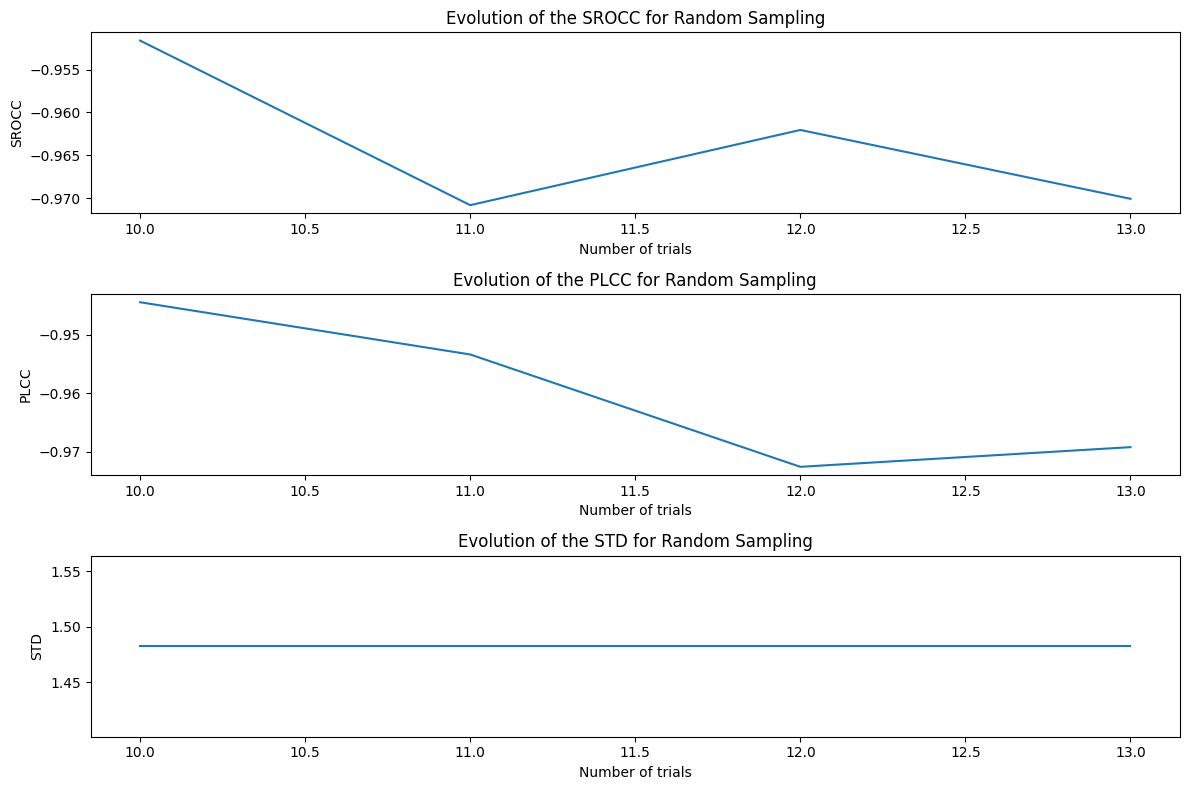

In [154]:
sroccs = []
plccs = []
stds = []

for nbTrial in nbTrials:
    groundTruthScores = generateGroundTruthScores(jodRange, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, randomSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(nbTrials, sroccs)
plt.ylabel('SROCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the SROCC for Random Sampling')

plt.subplot(3, 1, 2)
plt.plot(nbTrials, plccs)
plt.ylabel('PLCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the PLCC for Random Sampling')

plt.subplot(3, 1, 3)
plt.plot(nbTrials, stds)
plt.ylabel('STD')
plt.xlabel('Number of trials')
plt.title('Evolution of the STD for Random Sampling')

plt.tight_layout()
plt.show()

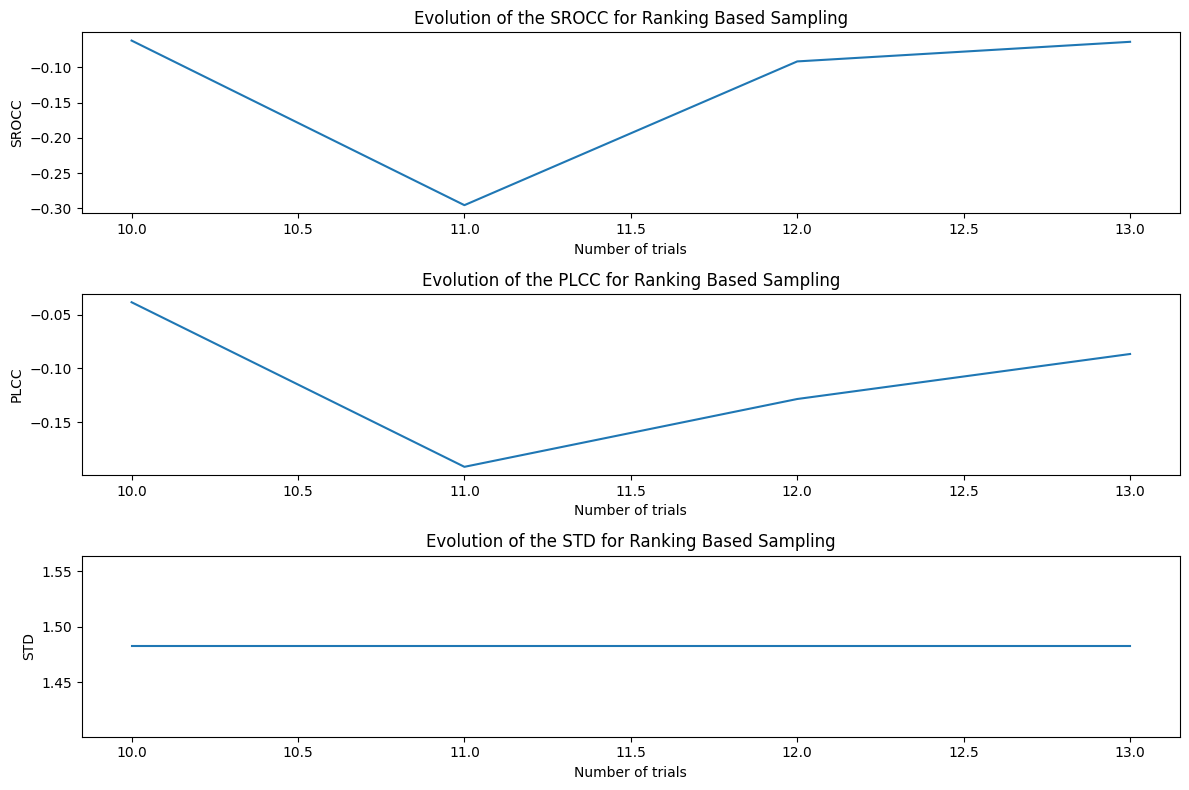

In [155]:
sroccs = []
plccs = []
stds = []

for nbTrial in nbTrials:
    groundTruthScores = generateGroundTruthScores(jodRange, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, rankingBasedSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(nbTrials, sroccs)
plt.ylabel('SROCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the SROCC for Ranking Based Sampling')

plt.subplot(3, 1, 2)
plt.plot(nbTrials, plccs)
plt.ylabel('PLCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the PLCC for Ranking Based Sampling')

plt.subplot(3, 1, 3)
plt.plot(nbTrials, stds)
plt.ylabel('STD')
plt.xlabel('Number of trials')
plt.title('Evolution of the STD for Ranking Based Sampling')

plt.tight_layout()
plt.show()

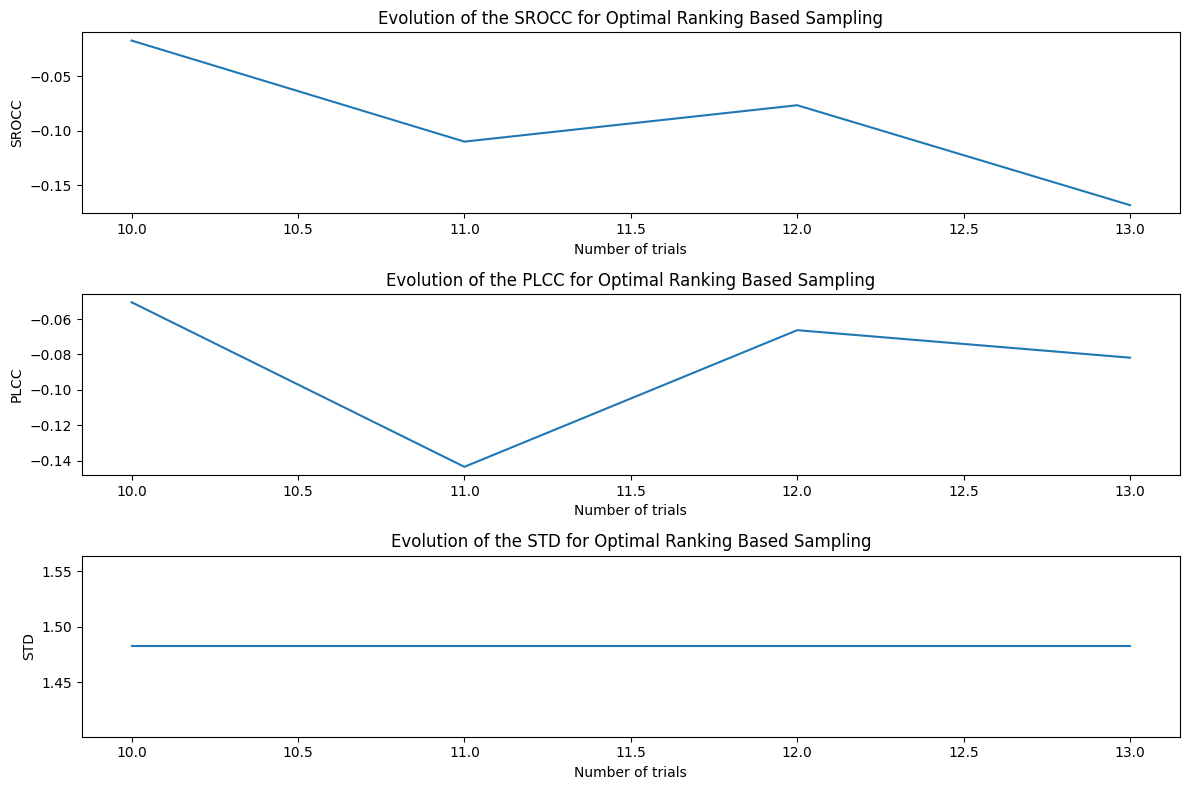

In [156]:
sroccs = []
plccs = []
stds = []

for nbTrial in nbTrials:
    groundTruthScores = generateGroundTruthScores(jodRange, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, optRankingBasedSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(nbTrials, sroccs)
plt.ylabel('SROCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the SROCC for Optimal Ranking Based Sampling')

plt.subplot(3, 1, 2)
plt.plot(nbTrials, plccs)
plt.ylabel('PLCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the PLCC for Optimal Ranking Based Sampling')

plt.subplot(3, 1, 3)
plt.plot(nbTrials, stds)
plt.ylabel('STD')
plt.xlabel('Number of trials')
plt.title('Evolution of the STD for Optimal Ranking Based Sampling')

plt.tight_layout()
plt.show()

In [161]:
def asapSampling(**kwargs):
    """
    1 - Takes the image scores and calculates the rank of each image.
    2 - Based on the ranking, select a batch of n-1 pairs, by taking the consecutive pairs of images.
    3 - Return the list of pairs
    """
    compMat = kwargs.get('imageScores', None)

    sortedIndices = np.argsort(compMat)

    pairList = [(sortedIndices[i], sortedIndices[i+1]) for i in range(len(sortedIndices)-1)]

    return pairList

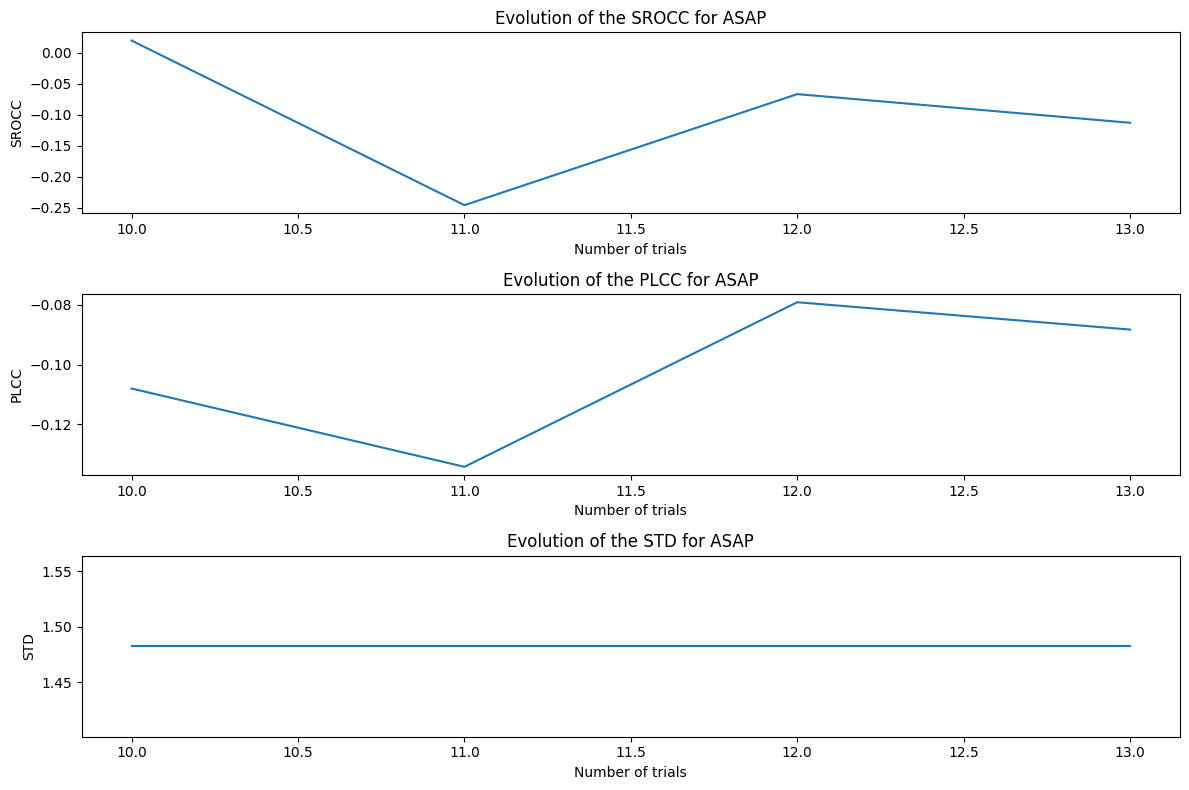

In [162]:
sroccs = []
plccs = []
stds = []

for nbTrial in nbTrials:
    groundTruthScores = generateGroundTruthScores(jodRange, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, asapSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(nbTrials, sroccs)
plt.ylabel('SROCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the SROCC for ASAP')

plt.subplot(3, 1, 2)
plt.plot(nbTrials, plccs)
plt.ylabel('PLCC')
plt.xlabel('Number of trials')
plt.title('Evolution of the PLCC for ASAP')

plt.subplot(3, 1, 3)
plt.plot(nbTrials, stds)
plt.ylabel('STD')
plt.xlabel('Number of trials')
plt.title('Evolution of the STD for ASAP')

plt.tight_layout()
plt.show()

> ### Q17: Let's now fix the number of standard trials (a.k.a the number of comparisons) to 1.5, and vary the JOD range of the scene. Plot again the SROCC, PLC and STD according to a varing JOD (2-20), for your 4 sampling algorithms. How do you interpret the results? Regarding the std, which sampling algorithm is better? why do you think this is the case?

In [164]:
nbImages = 20
nbTrials = 1.5
jodRange = range(2,21)

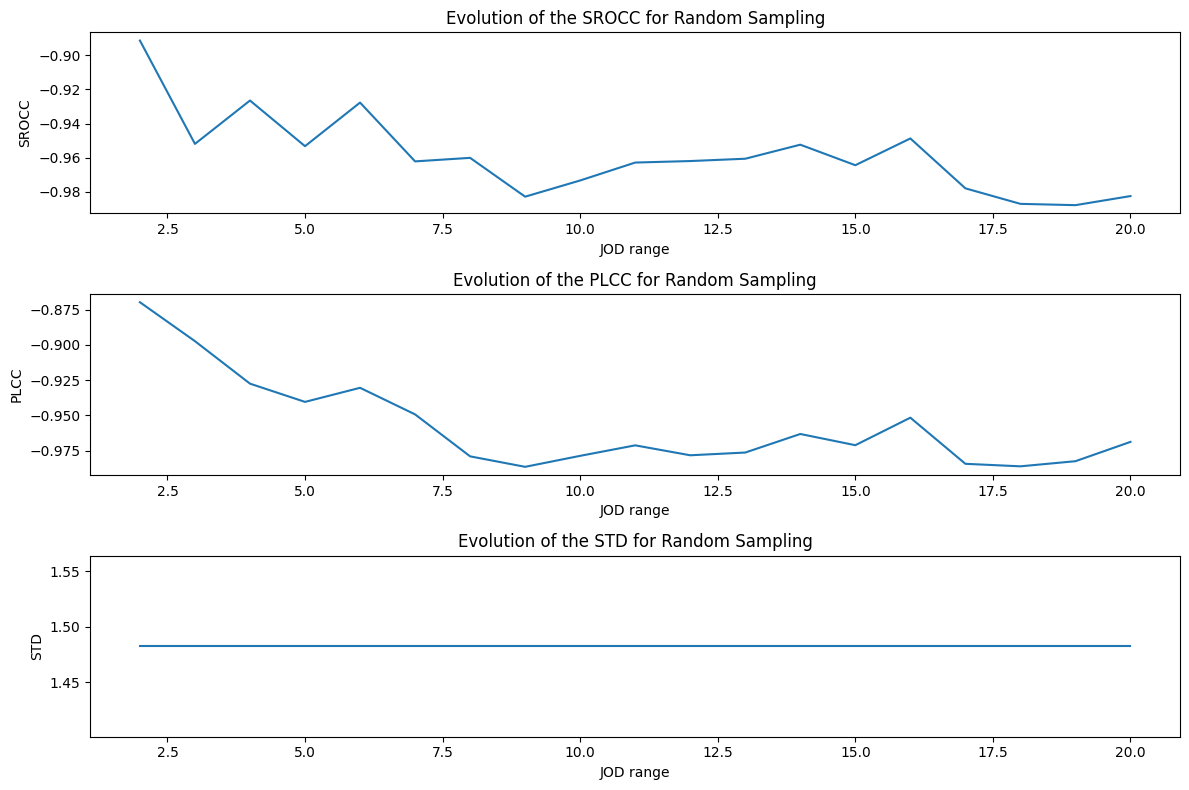

In [145]:
sroccs = []
plccs = []
stds = []

for jodRangeValue in jodRange:
    groundTruthScores = generateGroundTruthScores(jodRangeValue, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, randomSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(jodRange, sroccs)
plt.ylabel('SROCC')
plt.xlabel('JOD range')
plt.title('Evolution of the SROCC for Random Sampling')

plt.subplot(3, 1, 2)
plt.plot(jodRange, plccs)
plt.ylabel('PLCC')
plt.xlabel('JOD range')
plt.title('Evolution of the PLCC for Random Sampling')

plt.subplot(3, 1, 3)
plt.plot(jodRange, stds)
plt.ylabel('STD')
plt.xlabel('JOD range')
plt.title('Evolution of the STD for Random Sampling')

plt.tight_layout()
plt.show()

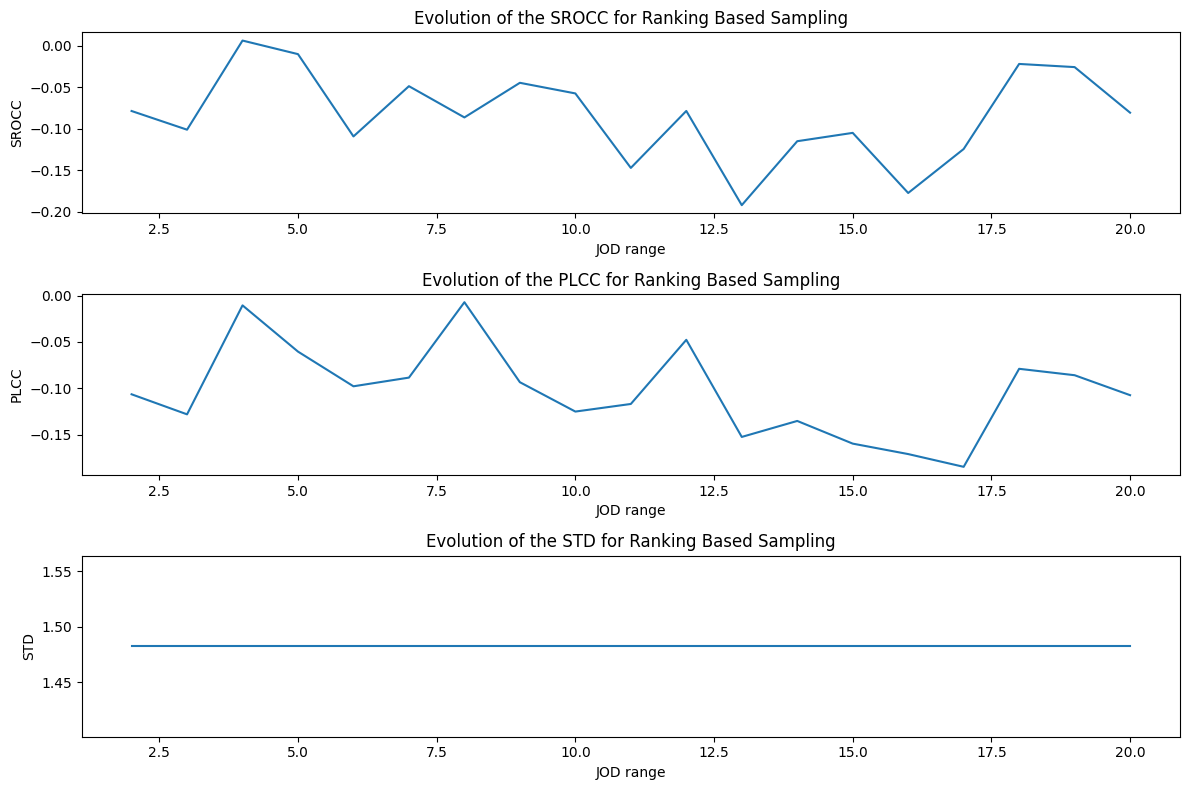

In [150]:
sroccs = []
plccs = []
stds = []

for jodRangeValue in jodRange:
    groundTruthScores = generateGroundTruthScores(jodRangeValue, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, rankingBasedSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(jodRange, sroccs)
plt.ylabel('SROCC')
plt.xlabel('JOD range')
plt.title('Evolution of the SROCC for Ranking Based Sampling')

plt.subplot(3, 1, 2)
plt.plot(jodRange, plccs)
plt.ylabel('PLCC')
plt.xlabel('JOD range')
plt.title('Evolution of the PLCC for Ranking Based Sampling')

plt.subplot(3, 1, 3)
plt.plot(jodRange, stds)
plt.ylabel('STD')
plt.xlabel('JOD range')
plt.title('Evolution of the STD for Ranking Based Sampling')

plt.tight_layout()
plt.show()

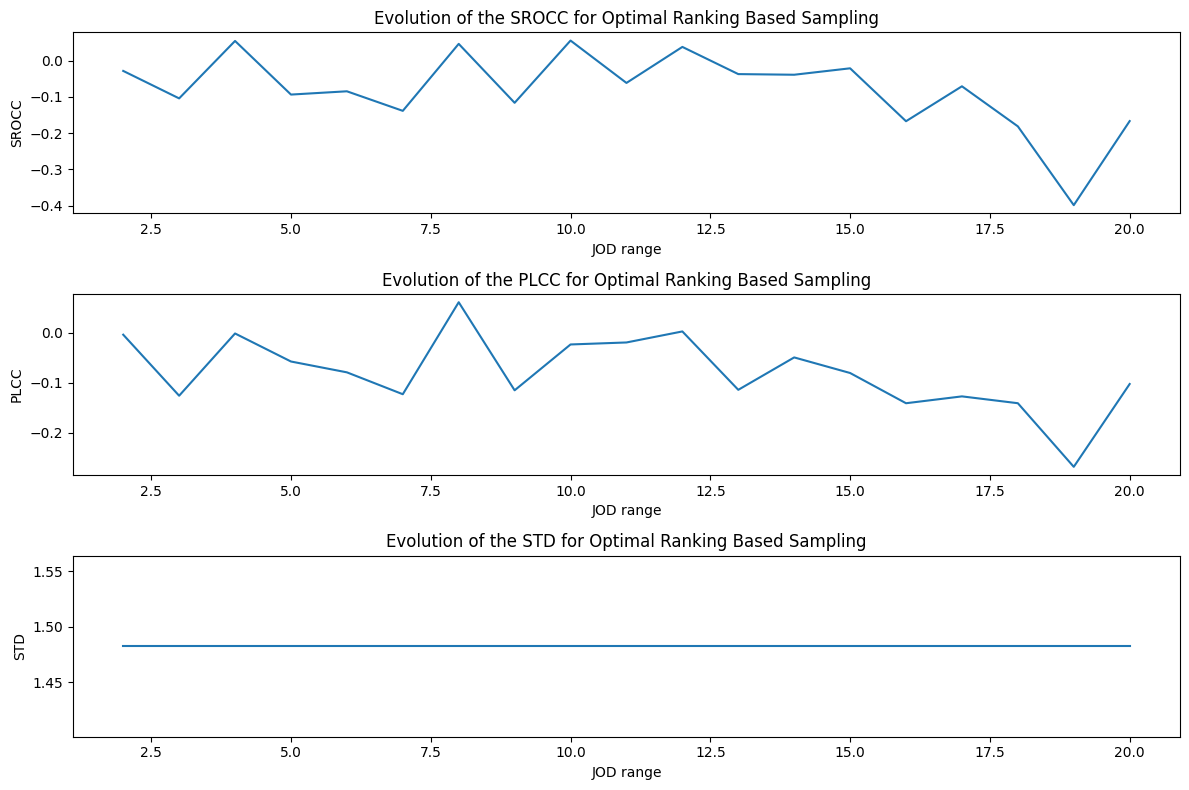

In [149]:
sroccs = []
plccs = []
stds = []

for jodRangeValue in jodRange:
    groundTruthScores = generateGroundTruthScores(jodRangeValue, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, optRankingBasedSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(jodRange, sroccs)
plt.ylabel('SROCC')
plt.xlabel('JOD range')
plt.title('Evolution of the SROCC for Optimal Ranking Based Sampling')

plt.subplot(3, 1, 2)
plt.plot(jodRange, plccs)
plt.ylabel('PLCC')
plt.xlabel('JOD range')
plt.title('Evolution of the PLCC for Optimal Ranking Based Sampling')

plt.subplot(3, 1, 3)
plt.plot(jodRange, stds)
plt.ylabel('STD')
plt.xlabel('JOD range')
plt.title('Evolution of the STD for Optimal Ranking Based Sampling')

plt.tight_layout()
plt.show()

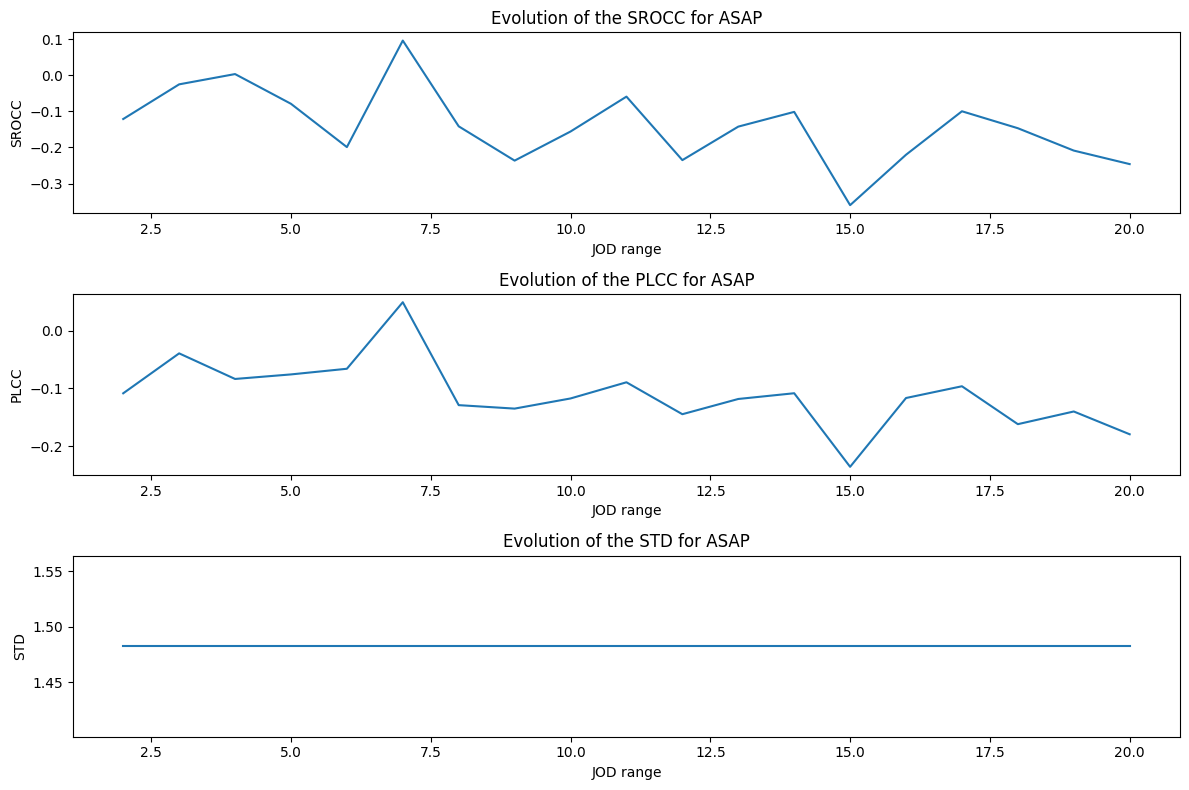

In [165]:
sroccs = []
plccs = []
stds = []

for jodRangeValue in jodRange:
    groundTruthScores = generateGroundTruthScores(jodRangeValue, nbImages)
    predictedScores, avgJOD, avgSTD = monteCarloPwcSim(groundTruthScores, nbTrial, pwcObserverSimulator, asapSampling)
    srocc, plcc, std = compute_correlation_and_std(groundTruthScores, predictedScores)
    sroccs.append(srocc)
    plccs.append(plcc)
    stds.append(std)

plt.subplot(3, 1, 1)
plt.plot(jodRange, sroccs)
plt.ylabel('SROCC')
plt.xlabel('JOD range')
plt.title('Evolution of the SROCC for ASAP')

plt.subplot(3, 1, 2)
plt.plot(jodRange, plccs)
plt.ylabel('PLCC')
plt.xlabel('JOD range')
plt.title('Evolution of the PLCC for ASAP')

plt.subplot(3, 1, 3)
plt.plot(jodRange, stds)
plt.ylabel('STD')
plt.xlabel('JOD range')
plt.title('Evolution of the STD for ASAP')

plt.tight_layout()
plt.show()

> ### Q18: What are the conclusions you can make from this experiment? What approach performs better and in what situtations?

> #### A18:

ASAP is the method that performs the best on any quality range, since it achieves the largest values for SROCC and PLCC. Meanwhile other sampling techniques depend on the quality range and the number of images.

In genral, we will need to use more sophisticated sampling approches if we are using wider quality gaps.

## D - Bootstrapping

> Since we do not have the ground truth scores in real life, we rely on a different approach to estimate the precision of the PWC experiments.

> ### Q19: In your opinion, what are possible steps to evaluate the results of a PWC experiment?

> #### A19:

* **Statistical Analysis:** use confidence intervals and p-values to assess significance
* **Correlation Metrics:** measure monotonic relationships with metrics like Spearman's rank correlation coefficient
* **Benchmarking:** compare results with benchmarks or datasets with known quality rankings
* **Users Feedback:** gather subjective assessments and feedback from users or experts
* **Robustness Testing:** test handling of variations and uncertainties in input data

> ### Q20:
One essential step to evaluate the PWC experiment is by estimating the confidence in our JOD scores. To do so, we compute the confidence intervals using percentile bootstrapping. Bootstrapping can be used to estimate the empirical distribution of our samples, and therefore its variability. In a PWC experiment, both the pairs and the individual comparison matrices (per person) can be considered candidate samples. Bootstrapping over the comparison samples usually results in smaller confidence intervals than over observer matrices.
> ### Explain how the following functions work

In [ ]:
def bootstrapMatrix(compMat, softSampling=False):
    """
    Soft sampling: instead of repeating the whole comparison pair, we sample per image, thus pair row
    """
    rows,cols = compMat.shape

    if softSampling:
        pairList = []
        for r in range(rows):
            rowPairList = np.where(compMat[r,:]!=0)[0]
            nbComparisons = int(np.sum(compMat[r,:]))
            rowPairList = [(r, pair1) for pair1 in rowPairList for i in range(int(compMat[r, pair1]))]

            pairList += [rowPairList[i] for i in np.random.choice(len(rowPairList), nbComparisons, replace=True)]
    else:
        pairList = np.where(compMat!=0)

        nbComparisons = int(np.sum(compMat))
        # We suppose that EACH comparison is one sample, hence for a pair with many comparisons, this is considered as many samples, from which comes the repetition of the same tuple.
        pairList = [(pair0, pair1) for pair0, pair1 in zip(pairList[0], pairList[1]) for i in range(int(compMat[pair0, pair1]))]
        pairList = [pairList[i] for i in np.random.choice(len(pairList), nbComparisons, replace=True)]

    compMat = np.zeros((rows, cols),)
    for pair in pairList:
        compMat[pair] += 1
    return compMat

def bootstrapObserverList(listObserverMatrices, ):
    nbObservers = len(listObserverMatrices)

    loadedObserverMatrices = []

    for file in listObserverMatrices:
        compMatData = np.load(file)
        compMat = compMatData['COMP_MAT']
        compMatData.close()
        loadedObserverMatrices.append(compMat)

    boostrappedMatrices = [loadedObserverMatrices[i] for i in np.random.choice(nbObservers, nbObservers, replace=True)]

    return np.sum(boostrappedMatrices, axis=0)

def confidenceInterval(variablesScoreList, confidenceLevel=0.95,):
    rows,cols = variablesScoreList.shape
    confidenceIntervals = np.zeros((rows,2))

    for i in range(rows):
        sortedScores = np.sort(variablesScoreList[i,:])
        confidenceIntervals[i,:] =  (sortedScores[int(np.floor((cols-1)*(1-confidenceLevel)/2))], sortedScores[int(np.ceil((cols-1)*(1+confidenceLevel)/2))])
    return confidenceIntervals

* **bootstrapMatrix:** Performs bootstrap resampling on a comparison matrix (compMat). It considers both pairs and individual comparison matrices as candidate samples. The parameter softSampling controls whether to perform soft sampling (per image) or traditional sampling (per pair). Soft sampling can be useful when there are multiple comparisons for a single image pair.
* **bootstrapObserverList:** Given a list of observer matrices (listObserverMatrices), this function performs bootstrap resampling by randomly selecting matrices from the list with replacement. The number of bootstrap matrices generated equals the total number of observers.

* **confidenceInterval:** Calculates confidence intervals for each row in a matrix (variablesScoreList). It sorts the scores for each row and determines the lower and upper bounds of the confidence interval based on the specified confidence level. The result is a matrix of confidence intervals, where each row corresponds to a JOD, and each column represents the lower and upper bounds of the interval.

# Part 3 (Optional)- Perceptual Scale generation from real annotation matrices

In this section, we will work on the real output of an annotation campaign. A group of 21 people annotated a set of images following a Pairwise methodology. The pairs were proposed by an active sampling algorithm.  We will extract the IQ score (JOD), the confidence interval for each image and, finally, identify the random annotator.

In the data folder, each file .npz corresponds to an unique annotator. The rows and columns of the matrix correspond to image files, the order can be found on the "LIST_FILES" field of the npz.  

In file create_global_comparison_matrix.py, you can find a function that allows you to compute the global comparison matrix, that is, the matrix that summarizes all information from all annotators.

> ### Q21 : Compute the global matrix and visualize it (check create_global_comparison_matrix.py). Do all images have the same number of comparisons? How many standard trials do we have?

>A21:

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from create_global_comparison_matrix import computeCommonCompDict

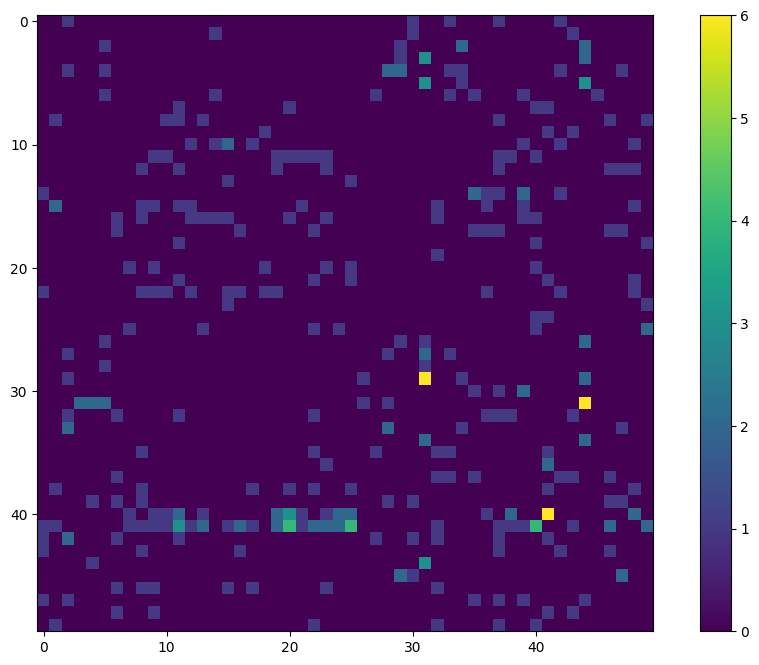

In [ ]:
results_path = '/content/Comparison Matrices/'
data_path = '/content/Comparison Matrices/'
experiment_name = 'TEST'
global_matrix = computeCommonCompDict(results_path, data_path, experiment_name)['COMP_MAT']
plt.imshow(global_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

* No, it seems that each image is not necessarily compared to all images. The number of comparisons for each image vary from 1 to 46.

In [ ]:
image_comparison_counts = np.sum(global_matrix, axis=1)
print(image_comparison_counts)

[ 5  3  6  6 10  7  7  4  7  3  8 10  8  2  8 11 11  8  3  1  6  5 12  2
  2  7  5  5  2 11  4 14  8  6  4  6  3  7  8  7 28 46 10  6  4  5  7  6
  4  5]



* Each non-zero entry represents a pairwise comparison made during a standard trial. The number of standard trials is then 373.

In [ ]:
total_trials = np.sum(global_matrix)
print(total_trials)

373


> ### Q22: What image was compared the must number of times?

>A22:

In [ ]:
most_compared_image_index = np.argmax(image_comparison_counts)
most_compared_image_count = image_comparison_counts[most_compared_image_index]
print("Image", most_compared_image_index, "was compared the most number of times with", most_compared_image_count, "comparisons.")

Image 41 was compared the most number of times with 46 comparisons.


> ### Q23: Extract the JOD scores for every image and plot them ordered by value

>A23

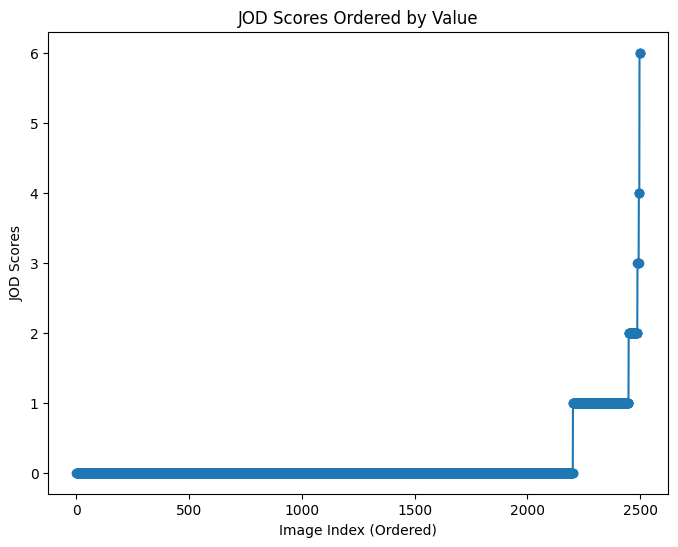

In [ ]:
jod_scores_flat = global_matrix.flatten()
sorted_indices = np.argsort(jod_scores_flat)
sorted_jod_scores = jod_scores_flat[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(sorted_jod_scores, marker='o')
plt.title('JOD Scores Ordered by Value')
plt.xlabel('Image Index (Ordered)')
plt.ylabel('JOD Scores')
plt.show()

> ### Q24: Using the functions introduced in the end of the previous section, generate the 95% confidence interval over 200 iterations of bootstrapping, by bootstrapping over comparisons and over observers.

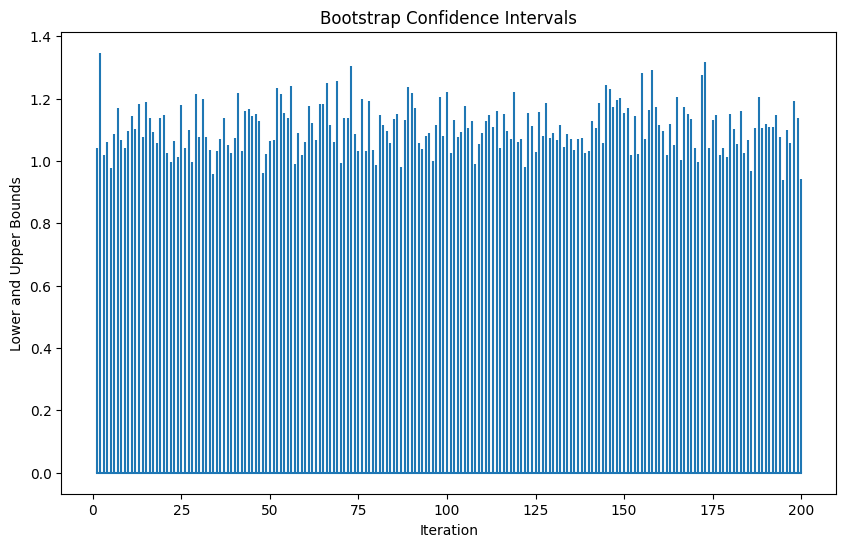

In [ ]:
compMat = global_matrix

observer_matrices_directory = '/content/Comparison Matrices/'

listObserverMatrices = [os.path.join(observer_matrices_directory, file) for file in os.listdir(observer_matrices_directory) if file.endswith(".npz")]

num_iterations = 200
bootstrap_results = np.zeros((num_iterations, 2))

for i in range(num_iterations):
    bootstrap_compMat = bootstrapMatrix(compMat, softSampling=False)
    jodScores,jodStds = adaComp.JODScores(bootstrap_compMat)
    bootstrap_results[i, 0] = np.mean(jodScores)
    bootstrap_results[i, 1] = np.mean(jodStds)

confidence_intervals = confidenceInterval(bootstrap_results)
lower_bound = confidence_intervals[:, 0]
upper_bound = confidence_intervals[:, 1]

plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(1, num_iterations + 1), bootstrap_results[:, 0], yerr=[bootstrap_results[:, 0] - lower_bound, upper_bound - bootstrap_results[:, 0]])
plt.xlabel('Iteration')
plt.ylabel('Lower and Upper Bounds')
plt.title('Bootstrap Confidence Intervals')
plt.show()

> ### Q25: What are your conclusions?

* The interval spans a range of JOD scores for each image, reflecting the uncertainty introduced by bootstrapping.
* The width of the interval indicates the variability in JOD scores for each image across bootstrap samples.
* The range varies across images between 1.0 and 1.3, indicating different levels of uncertainty in the JOD scores.
* Annotators with larger confidence intervals may be considered more "random" or less consistent in their judgments.

In [ ]:
ci_widths = confidence_intervals[:, 1] - confidence_intervals[:, 0]
random_annotator_index = np.argmax(ci_widths)
print(f"The random annotator is annotator {random_annotator_index + 1}")

The random annotator is annotator 2
